### Se pide, usando regresión lineal:

Dibujar con una línea la relación que hay entre la altura y la edad de los alumnos de la clase: 

- ¿Es una buena técnica para este tipo de problemas? ¿Por qué? 
- ¿Qué error se comete? Calcula los errores que está cometiendo tu modelo uno a uno (lo tienes que calcular tú con python). Aparte, usa el MSE y el RMSE. ¿Alguno es mejor para este problema?
- Representa la matriz de correlación, ¿los datos están correlacionados?
- ¿Qué ocurre si la altura se multiplica por dos? ¿Y si se multiplica solo la edad? 

In [1]:
lista_edad_altura = [("Clara Piniella", 30, 1.66),("Daniel Walker", 34, 1.87), ("Leonardo Frazzetto", 31, 1.78),("Xinru Yang", 24, 1.60), ("Jorge Garcia", 28, 1.79), ("Jonathan Suárez", 27, 1.86),("Marina Serrano", 25, 1.54), ("Karina Inche", 30, 1.61), ("Mary Meza", 32, 1.52),("Borja Puig", 37, 1.82), ("Mauro Garcia-Oliva", 45, 1.77), ("José Carlos Batista", 28, 1.70),("Isabel Palomares",24,1.78),("Gina Garrido",57,1.63), ("Sonia Cobo", 29, 1.73), ("Miguel Barquero", 35, 1.85),("Nacho Astorga",47,1.78), ("Adrià Gallardo", 24, 1.70), ("Juan Bayon", 38, 1.64), ("Nacho Fontal", 35, 1.82), ("Pablo Eduardo", 29, 1.75), ("Javier Araiz", 30, 1.72)]

In [10]:
len(lista_edad_altura)

22

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [4]:
df = pd.DataFrame(lista_edad_altura, columns=['Name', 'Age', 'Height'])

In [5]:
lm = LinearRegression(n_jobs=-1)

In [32]:
def plot_age_height_ratio(model, df):
        x = np.array(df['Height'])
        y = np.array(df['Age'])
        x = x.reshape(-1, 1)
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
        model.fit(x_train, y_train)

        plt.scatter(x, y, color='royalblue')
        plt.plot(x, model.predict(x), color='firebrick')
        plt.title('Age/Height Ratio')

        plt.show()
        return model.predict(x_test), y_test

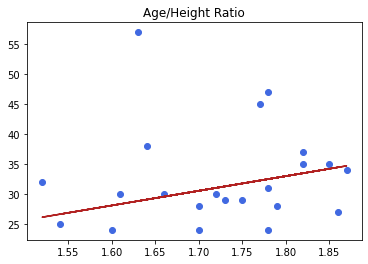

In [33]:
y_predict, y_test = plot_age_height_ratio(lm, df)

In [ ]:
# ¿Es una buena técnica para este tipo de problemas? ¿Por qué?
# No es una buena técnica dado que presenta una correlación prácticamente nula. La edad y la altura no tienen una relación directa.


In [22]:
def mean_absolute_error(y_predict, y_test):
    return sum(abs(y_predict - y_test))/len(y_test)

def mean_squared_error(y_predict, y_test):
    return sum((y_predict - y_test)**2)/len(y_test)

def root_mean_sqr_error(y_predict, y_test):
    return np.sqrt(mean_squared_error(y_predict, y_test))

In [34]:
MAE = mean_absolute_error(y_predict, y_test)
MSE = mean_squared_error(y_predict, y_test)
RMSE = root_mean_sqr_error(y_predict, y_test)

print('MAE:', MAE)
print('MSE:', MSE)
print('RMSE:', RMSE)

MAE: 7.199657273419652
MSE: 166.03125193593976
RMSE: 12.885311479973613


In [35]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

MAE: 7.199657273419652
MSE: 166.03125193593976
RMSE: 12.885311479973613


In [ ]:
# ¿Qué error se comete? Calcula los errores que está cometiendo tu modelo uno a uno (lo tienes que calcular tú con python). Aparte, usa el MSE y el RMSE. ¿Alguno es mejor para este problema?
# El RMSE es casi el doble que el MAE, lo que significa que existen muchos 'outliers' y es otra prueba de que el modelo no es eficiente.

<AxesSubplot:>

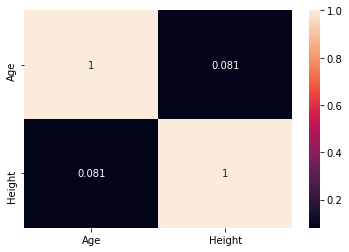

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(df.corr(), annot=True)

In [ ]:
# Representa la matriz de correlación, ¿los datos están correlacionados?
# Los datos tienen una correlación practicamente nula.

In [26]:
altura_x2 = df.copy()
altura_x2['Height'] = altura_x2['Height'].apply(lambda x: x*2)

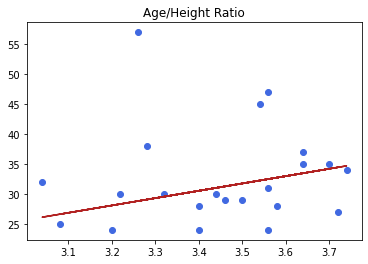

In [36]:
y_predict_A2, y_test_A2 = plot_age_height_ratio(lm, altura_x2)

In [30]:
edad_x2 = df.copy()
edad_x2['Age'] = edad_x2['Age'].apply(lambda x: x*2)

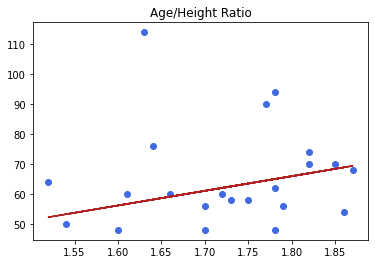

In [37]:
y_predict_E2, y_test_E2 = plot_age_height_ratio(lm, edad_x2)

In [ ]:
# Qué ocurre si la altura se multiplica por dos? ¿Y si se multiplica solo la edad?
# La recta tiene la misma pendiente en cualquiera de los casos, demostrando que aunque se varíe linealmente cualquiera de los ejes x e y no va a afectar a la correlación y, por lo tanto, no es un buen modelo.